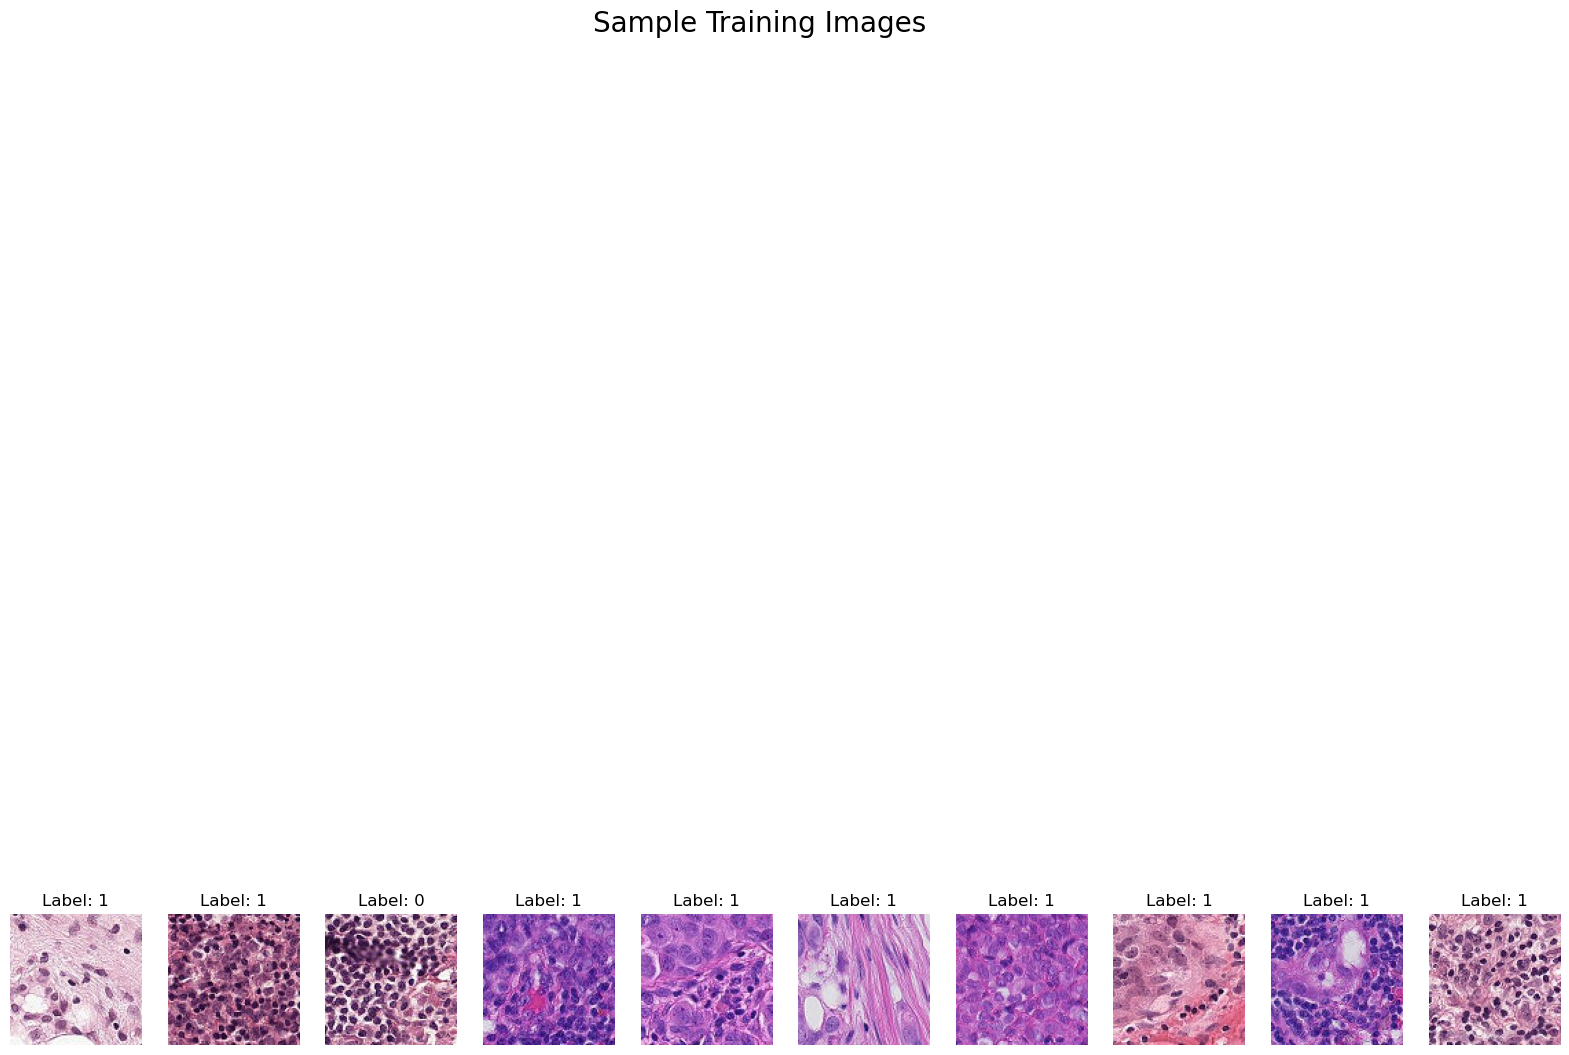

In [1]:
"""
Exploratory Data Analysis (EDA)
First, we'll inspect, visualize, and clean the data. This involves loading the images, visualizing some samples, and understanding the distribution of classes.
1. Loading and Visualizing Data
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set paths
# train_dir = '/path/to/train/'
# test_dir = '/path/to/test/'
# train_labels = pd.read_csv('/path/to/train_labels.csv')
# Set paths
train_dir = r'C:\Users\Gyadav\Desktop\PW\Official\MSCS\ML\Deep_Learning\Week3\histopathologic-cancer-detection\train'
test_dir = r'C:\Users\Gyadav\Desktop\PW\Official\MSCS\ML\Deep_Learning\Week3\histopathologic-cancer-detection\test'
train_labels = pd.read_csv(r'C:\Users\Gyadav\Desktop\PW\Official\MSCS\ML\Deep_Learning\Week3\histopathologic-cancer-detection\train_labels.csv')


# Display a few images
def display_images(images, labels, title=None):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    if title:
        plt.suptitle(title, size=20)
    plt.show()

# Load a few samples
sample_images = []
sample_labels = []
for img_name, label in train_labels.sample(10).values:
    img_path = os.path.join(train_dir, f'{img_name}.tif')
    image = Image.open(img_path)
    sample_images.append(image)
    sample_labels.append(label)

display_images(sample_images, sample_labels, "Sample Training Images")


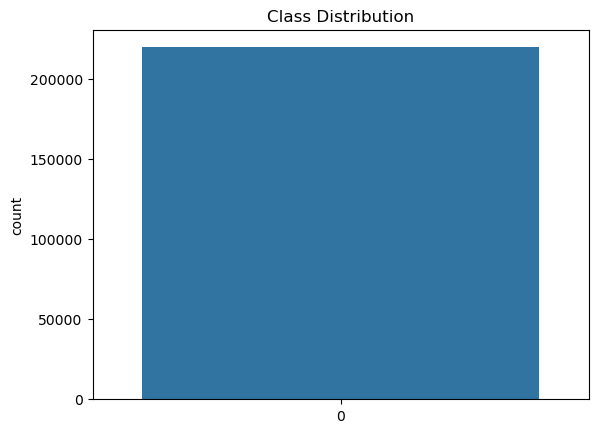

In [2]:
#2 - Data Distribution 
# Plot class distribution
sns.countplot(train_labels['label'])
plt.title('Class Distribution')

plt.show()

In [3]:
"""
Data Cleaning
Check for missing values and validate the integrity of image files.
"""

# Check for missing values
print(train_labels.isnull().sum())

# Check for corrupted images
corrupt_images = []
for img_name in train_labels['id']:
    try:
        img_path = os.path.join(train_dir, f'{img_name}.tif')
        Image.open(img_path)
    except Exception as e:
        corrupt_images.append(img_name)

print(f'Number of corrupt images: {len(corrupt_images)}')

id       0
label    0
dtype: int64
Number of corrupt images: 0


In [4]:
"""
Plan of Analysis
Preprocess images (resize, normalization).
Split data into training and validation sets.
Experiment with different model architectures (CNN, ResNet, etc.).
Hyperparameter tuning and model evaluation.
Model Architecture
I am starting this with a simple Convolutional Neural Network (CNN) and probebly later can explore deeper architectures like ResNet.

1. Simple CNN
"""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_simple_cnn()
model.summary()


C:\Users\Gyadav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,984,577 (15.20 MB)

 Trainable params: 3,984,577 (15.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# #Training and Evaluation
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Split data
# train_df, val_df = train_test_split(train_labels, test_size=0.2, stratify=train_labels['label'])

# # Image data generators
# train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_dataframe(train_df, directory=train_dir, x_col='id', y_col='label', class_mode='binary', target_size=(96, 96), batch_size=32)
# val_generator = val_datagen.flow_from_dataframe(val_df, directory=train_dir, x_col='id', y_col='label', class_mode='binary', target_size=(96, 96), batch_size=32)

# # Train model
# history = model.fit(train_generator, validation_data=val_generator, epochs=10)


# Training and Evaluation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the data (assuming 'train_labels' is a dataframe containing your data)
# Update the path to your train labels CSV file
#train_labels = pd.read_csv('C:/tmp/ML/Deep_Learning/Week3/histopathologic-cancer-detection/train_labels.csv')
train_labels = pd.read_csv(r'C:\Users\Gyadav\Desktop\PW\Official\MSCS\ML\Deep_Learning\Week3\histopathologic-cancer-detection\train_labels.csv')

# Ensure that the 'label' column values are strings
train_labels['label'] = train_labels['label'].astype(str)

# Set the directory path
#train_dir = "C:/tmp/ML/Deep_Learning/Week3/histopathologic-cancer-detection/train"
train_dir = r'C:\Users\Gyadav\Desktop\PW\Official\MSCS\ML\Deep_Learning\Week3\histopathologic-cancer-detection\train'

# Split data
train_df, val_df = train_test_split(train_labels, test_size=0.2, stratify=train_labels['label'])

# Check a few samples to ensure filenames are correct
print(train_df.head())

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Ensure filenames in 'id' column have the correct extension, if required
train_df['id'] = train_df['id'].apply(lambda x: x + '.tif')  # Add extension if needed
val_df['id'] = val_df['id'].apply(lambda x: x + '.tif')      # Add extension if needed

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=train_dir,
    x_col='id',
    y_col='label',
    class_mode='binary',
    target_size=(96, 96),
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=train_dir,
    x_col='id',
    y_col='label',
    class_mode='binary',
    target_size=(96, 96),
    batch_size=32
)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


                                              id label
145124  c97b651d56bdfe1fa964f1107450fd7b9c9664b6     0
31640   fe3f246a38563414b0349aca5d4333ec087af4bf     0
40656   f262f1443626e2094c3f034daaf1704f8d8c46cf     0
168137  17a509385292489d3f70718786a8526e20729455     0
158810  61160f6ad4639f9cb6611dd79410531cac12acbc     0
Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.
Epoch 1/10


C:\Users\Gyadav\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5501/5501 ━━━━━━━━━━━━━━━━━━━━ 3437s 623ms/step - accuracy: 0.7632 - loss: 0.5052 - val_accuracy: 0.8080 - val_loss: 0.4310
Epoch 2/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5833s 1s/step - accuracy: 0.8122 - loss: 0.4231 - val_accuracy: 0.8250 - val_loss: 0.3953
Epoch 3/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 2291s 416ms/step - accuracy: 0.8230 - loss: 0.4009 - val_accuracy: 0.8327 - val_loss: 0.3822
Epoch 4/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 2186s 397ms/step - accuracy: 0.8339 - loss: 0.3827 - val_accuracy: 0.8364 - val_loss: 0.3723
Epoch 5/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 2136s 388ms/step - accuracy: 0.8507 - loss: 0.3547 - val_accuracy: 0.8531 - val_loss: 0.3392
Epoch 6/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 2217s 403ms/step - accuracy: 0.8602 - loss: 0.3357 - val_accuracy: 0.8623 - val_loss: 0.3245
Epoch 7/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 2326s 423ms/step - accuracy: 0.8638 - loss: 0.3250 - val_accuracy: 0.8730 - val_loss: 0.3060
Epoch 8/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1815s 329ms/step - accuracy

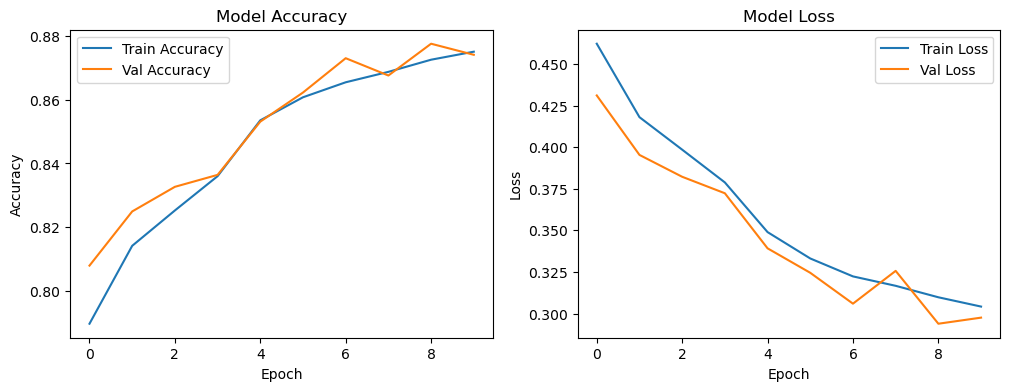

In [13]:
#Results and Analysis
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
"""

Model Performance Analysis
Model Accuracy
Training Accuracy: The training accuracy starts at around 0.80 and shows a steady increase, 
peaking at approximately 0.88 by the 9th epoch.

Validation Accuracy: The validation accuracy also shows a steady increase, 
beginning at around 0.82 and peaking at around 0.88 by the 9th epoch.

The close alignment of the training and validation accuracy curves indicates that the model is learning well 
and generalizing effectively to the validation data. There is no significant sign of overfitting 
as the validation accuracy is not decreasing or diverging significantly from the training accuracy.

Model Loss
Training Loss: The training loss starts at around 0.45 and decreases steadily, reaching approximately 0.30 by the 9th epoch.
Validation Loss: The validation loss also decreases, starting at around 0.43 and decreasing to around 0.30 by the 9th epoch.
The steady decrease in both training and validation loss indicates that the model is learning and improving over the epochs. 
The close alignment of training and validation loss curves further suggests that the model is not overfitting.

Conclusion
The model shows good learning behavior with both accuracy and loss improving over the epochs. The close alignment of the training and validation metrics indicates effective generalization, with no significant signs of overfitting. Based on these observations, the model appears to be performing well on the given task.

"""